In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Gamification

Inciter les utilisateurs à entreprendre des actions qui ont de la valeur pour le site.
Trois éléments :
- Des actions à faire
- Des récompenses
- Une correspondance assurée par des niveaux

### Maquette rapide
<img src="maquette.png">

### Les actions
| Nom | Nombre de points
| --- | ---
| Action 1 | 1
| Action 2 | 5
| Action 3 | 50

### Les récompenses

La forme de la récompense peut avoir un effet sur la motivation à franchir un pallier d'où la mise en place de plusieures types de récompenses :

- Discount sur le prochain achat
- Bon d'achat sur le site (ou sur une catégorie)
- Autre ... ?

### Les niveaux
Le passage d'un niveau à un autre corrrespond à l'atteinte d'un nombre de points déterminé à l'avance.
En début de parcours, il est facile de passer des supérieur et plus on avance, plus la tâche est difficile.

D'où le fait de prendre une échelle logarithmique pour déterminer les seuils de progression.

In [2]:
nb_points = np.arange(10000)

In [3]:
def level(x):
    return np.sqrt(x) * np.log10(x) / 20

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in multiply
  from ipykernel import kernelapp as app


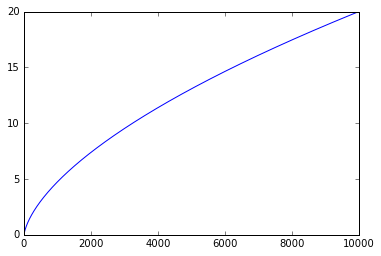

In [4]:
plt.plot(nb_points,level(nb_points));

In [5]:
def level_int(x):
    return int(np.sqrt(x) * np.log10(x) / 20)

In [6]:
print("J'ai gagné 40 points, je suis niveau {0}".format(level_int(40)))
print("J'ai gagné 100 points, je suis niveau {0}".format(level_int(100)))
print("J'ai gagné 1000 points, je suis niveau {0}".format(level_int(1000)))
print("J'ai gagné 5000 points, je suis niveau {0}".format(level_int(5000)))
print("J'ai gagné 10000 points, je suis niveau {0}".format(level_int(10000)))


J'ai gagné 40 points, je suis niveau 0
J'ai gagné 100 points, je suis niveau 1
J'ai gagné 1000 points, je suis niveau 4
J'ai gagné 5000 points, je suis niveau 13
J'ai gagné 10000 points, je suis niveau 20


### Attribution des récompenses
Faisons l'hypothèse que pour chaque franchissement de niveau, on attribue une récompense
On souhaite tester le type de récompense qui fonctionne le mieux.
- Bon d'achat
- Réduction sur achat
- Cadeau

Parmi les users qui ont atteint l'objectif déclenchant la récompense, on peut calculer le temps moyen (rapporté à l'échelle ci-dessus) pour déterminer le type de récompense qui suscite le plus de motivation.

In [7]:
def incentive_type(level, scale=1):
    next_level = level - level % scale + scale
    if next_level % (scale*3) == 0:
        incentive = "Bon d'achat"
    if next_level % (scale*3) == (scale*1):
        incentive = "Reduction"
    if next_level % (scale*3) == (scale*2):
        incentive = "Cadeau"
    return incentive

In [8]:
def thresholds(nb_points_list):
    thresholds_list = []
    start = nb_points_list[0]
    level = 0
    for i in nb_points_list:
        if not thresholds_list:
            values = np.arange(start) + 1
            for val in values:
                if level_int(val) > level:
                    thresholds_list.append( (val,level_int(val)))
                    level = level_int(val)
        else:
            # thresholds_list[-1][0] corresponds to the nb of points of the last iteration
            values = np.arange(thresholds_list[-1][0],i) + 1
            for val in values:
                if level_int(val) > level:
                    thresholds_list.append( (val,level_int(val)))
                    level = level_int(val)
    return thresholds_list

In [9]:
one_user = {
    "30": 150,
    "60": 320,
    "90": 600,
    "120": 790,
    "150": 1000,
    "180": 1300,
}

In [10]:
x = sorted(map(int, one_user.keys()))
y = sorted(one_user.values())

## Représentation graphique

- Les lignes verticales représentent les frontières séparant les niveaux entre eux
- Pour chaque point de la courbe on annote avec le niveau et le type d'incentive qui sera attribué lors du passage au niveau supérieur
- L'axe des absisses représente le nombre de jours depuis l'inscription (un point tous les 30 jours)

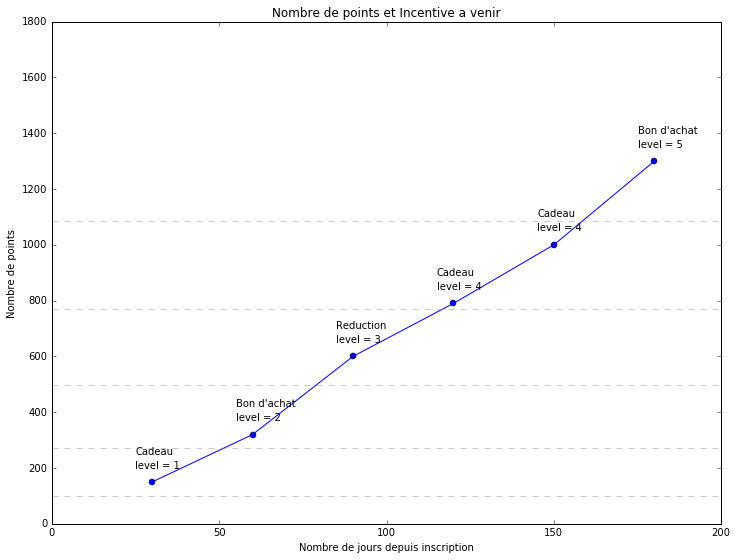

In [11]:
level_thresholds = thresholds(y)

plt.figure(figsize=(12,9))
plt.plot(x,y)
plt.plot(x, y, 'bo')
plt.ylim(0,1800)
plt.xlim(0,200)
for i in range(len(one_user)):
    plt.annotate(incentive_type(level_int(y[i])), xy=(x[i], y[i]), xytext=(x[i]-5, y[i] +100))
for i in range(len(one_user)):
    plt.annotate("level = {0}".format(int(level_int(y[i]))), xy=(x[i], y[i]), xytext=(x[i]-5, y[i] +50))
plt.xlabel('Nombre de jours depuis inscription')
plt.ylabel('Nombre de points')
plt.title('Nombre de points et Incentive a venir')

for i in range(len(level_thresholds)):
    plt.axhline(y= level_thresholds[i][0], color='gray', alpha=.4,ls='--')
